# 🔴 Task 20->Feature Engineering

#### Objective: Identify the most relevant features from a dataset.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from IPython.display import display
from category_encoders import TargetEncoder

In [26]:
iris_df = pd.read_csv('Iris.csv')
display(iris_df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
encoded_df = pd.get_dummies(iris_df, columns=['Species'])
numeric_cols = encoded_df.select_dtypes(include=['number']).columns
numeric_df = encoded_df[numeric_cols]
corr_mat_iris = numeric_df.corr()
display(corr_mat_iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


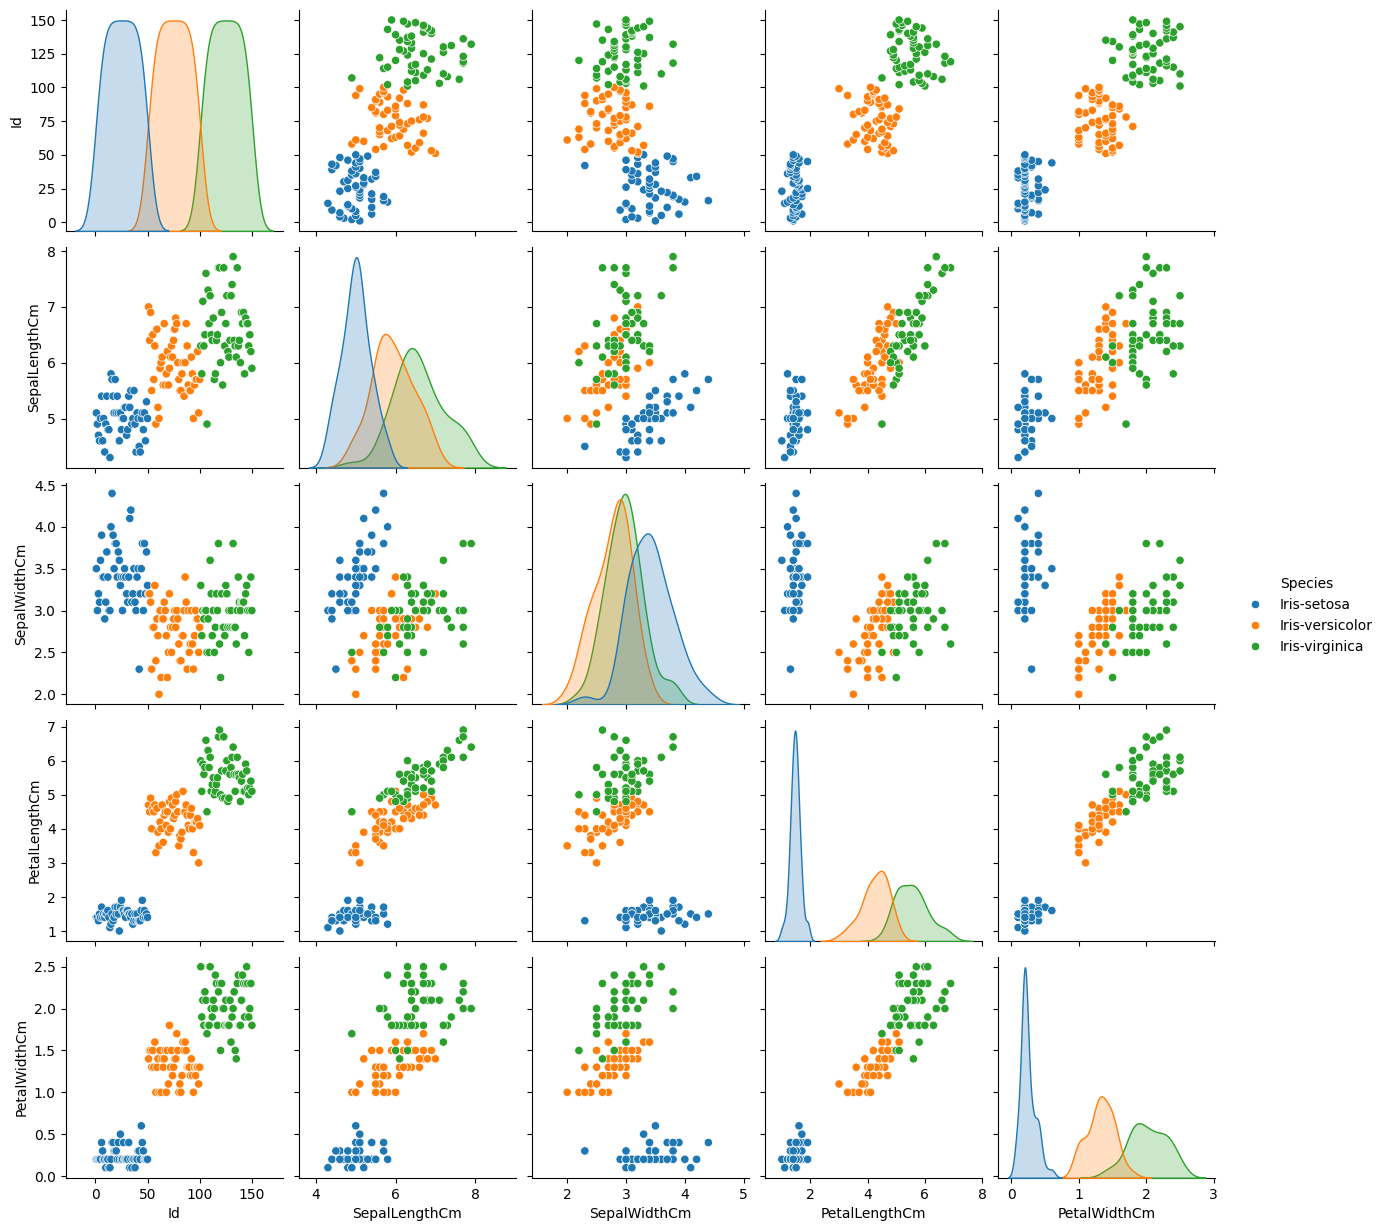

In [28]:
sns.pairplot(iris_df, hue='Species')
plt.show()

In [29]:
rm_unwanted = iris_df.drop('Species', axis=1)
select = iris_df['Species']
mu_inf = mutual_info_classif(rm_unwanted, select)
display(dict(zip(rm_unwanted.columns, mu_inf)))

{'Id': 1.0768641392033418,
 'SepalLengthCm': 0.4869315485057766,
 'SepalWidthCm': 0.2638735584744323,
 'PetalLengthCm': 0.9979937230327287,
 'PetalWidthCm': 0.9877305119862356}

# Observation

#### 1. Sepal Length: The sepal length is 0.48, which is quite low compared to Iris flowers.

#### 2. Sepal Width: The sepal width is 0.26, which is also on the smaller side compared Iris sepal widths.

#### 3. Petal Length: The petal length is 0.99, large, and is a key feature of the specific Iris species.

#### 4. Petal Width: The petal width is 0.98, which is also quite large and goes along with the long petal length.

# Conclusion

#### Given the combination of features observed, this Iris flower likely belongs to a species that typically has long and wide petals, such as the Iris virginica or Iris versicolor. The relatively small sepal length and width of this flower help differentiate it from the Iris setosa species, which usually has shorter and narrower sepals.

## Task 2: Feature Transformation

#### 1. Objective: Identify the most relevant features from a dataset.

In [30]:
iris_df['SepalLengthCm_log'] = np.log(iris_df['SepalLengthCm'])
iris_df['SepalWidthCm_log'] = np.log(iris_df['SepalWidthCm'])
iris_df['PetalLengthCm_log'] = np.log(iris_df['PetalLengthCm'])
iris_df['PetalWidthCm_log'] = np.log(iris_df['PetalWidthCm'])

In [31]:
scaler = MinMaxScaler()
iris_df[['SepalLengthCm_norm', 'SepalWidthCm_norm', 'PetalLengthCm_norm', 'PetalWidthCm_norm']] = scaler.fit_transform(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [32]:
std_scaler = StandardScaler()
iris_df[['SepalLengthCm_std', 'SepalWidthCm_std', 'PetalLengthCm_std', 'PetalWidthCm_std']] = std_scaler.fit_transform(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [45]:
display(iris_df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_log,SepalWidthCm_log,PetalLengthCm_log,PetalWidthCm_log,...,SepalLengthCm_std,SepalWidthCm_std,PetalLengthCm_std,PetalWidthCm_std,s_asprat,p_asprat,sp_length_ratio,sp_width_rat,tot_length,tot_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.629241,1.252763,0.336472,-1.609438,...,-0.900681,1.032057,-1.341272,-1.312977,1.457143,7.0,3.642857,17.5,6.5,3.7
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.589235,1.098612,0.336472,-1.609438,...,-1.143017,-0.124958,-1.341272,-1.312977,1.633333,7.0,3.500000,15.0,6.3,3.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.547563,1.163151,0.262364,-1.609438,...,-1.385353,0.337848,-1.398138,-1.312977,1.468750,6.5,3.615385,16.0,6.0,3.4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.526056,1.131402,0.405465,-1.609438,...,-1.506521,0.106445,-1.284407,-1.312977,1.483871,7.5,3.066667,15.5,6.1,3.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.609438,1.280934,0.336472,-1.609438,...,-1.021849,1.263460,-1.341272,-1.312977,1.388889,7.0,3.571429,18.0,6.4,3.8


## Task 3: Feature Creation

####  Objective: Create new features from existing data.

In [34]:
iris_df['s_asprat'] = iris_df['SepalLengthCm'] / iris_df['SepalWidthCm']
iris_df['p_asprat'] = iris_df['PetalLengthCm'] / iris_df['PetalWidthCm']
iris_df['sp_length_ratio'] = iris_df['SepalLengthCm'] / iris_df['PetalLengthCm']
iris_df['sp_width_rat'] = iris_df['SepalWidthCm'] / iris_df['PetalWidthCm']
iris_df['tot_length'] = iris_df['SepalLengthCm'] + iris_df['PetalLengthCm']
iris_df['tot_width'] = iris_df['SepalWidthCm'] + iris_df['PetalWidthCm']

display(iris_df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_log,SepalWidthCm_log,PetalLengthCm_log,PetalWidthCm_log,...,SepalLengthCm_std,SepalWidthCm_std,PetalLengthCm_std,PetalWidthCm_std,s_asprat,p_asprat,sp_length_ratio,sp_width_rat,tot_length,tot_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.629241,1.252763,0.336472,-1.609438,...,-0.900681,1.032057,-1.341272,-1.312977,1.457143,7.0,3.642857,17.5,6.5,3.7
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.589235,1.098612,0.336472,-1.609438,...,-1.143017,-0.124958,-1.341272,-1.312977,1.633333,7.0,3.500000,15.0,6.3,3.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.547563,1.163151,0.262364,-1.609438,...,-1.385353,0.337848,-1.398138,-1.312977,1.468750,6.5,3.615385,16.0,6.0,3.4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.526056,1.131402,0.405465,-1.609438,...,-1.506521,0.106445,-1.284407,-1.312977,1.483871,7.5,3.066667,15.5,6.1,3.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.609438,1.280934,0.336472,-1.609438,...,-1.021849,1.263460,-1.341272,-1.312977,1.388889,7.0,3.571429,18.0,6.4,3.8


# Task 4: Polynomial Features

#### Objective: Generate polynomial features to capture non-linear relationships.

In [35]:
boston_df = pd.read_csv('housing.csv')
display(boston_df)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


Polynomial features: ['RM' 'LSTAT' 'PTRATIO' 'RM^2' 'RM LSTAT' 'RM PTRATIO' 'LSTAT^2'
 'LSTAT PTRATIO' 'PTRATIO^2']


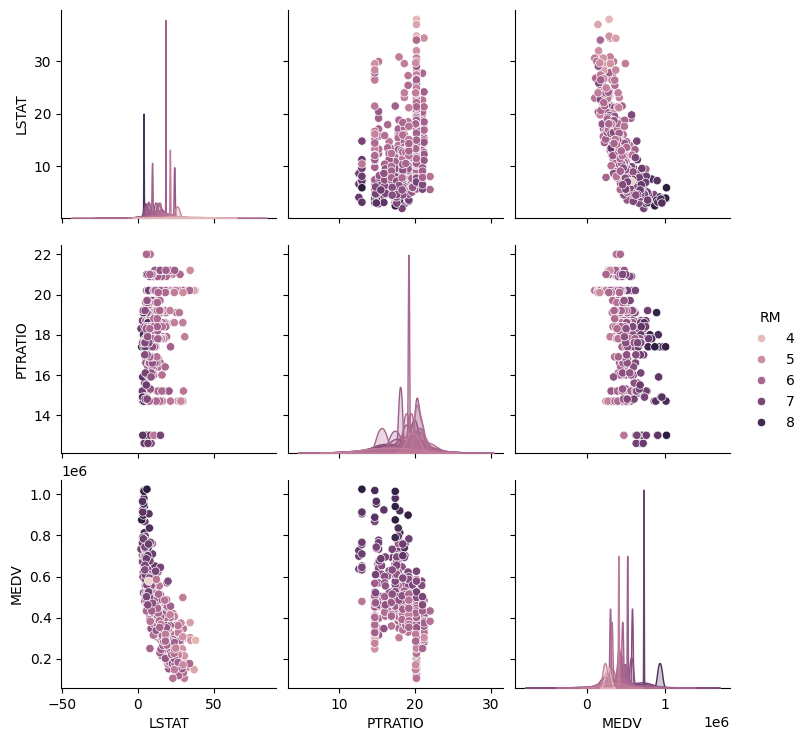

In [47]:
poly = PolynomialFeatures(degree=2, include_bias=False)
unwanted = boston_df.drop('MEDV', axis=1)
unwanted_poly = poly.fit_transform(unwanted)

print("Polynomial features:", poly.get_feature_names_out())
sns.pairplot(boston_df, hue='RM')
plt.show()

# Task 5: Handling Categorical Features

In [37]:
titanic_df = pd.read_csv('titanic.csv')
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
titanic_se = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])
display(titanic_se)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,False,True,False,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,True,False,True,False,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,True,False,False,True
416,1308,0,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,False,True,False,False,True


In [39]:
label_encoder = LabelEncoder()
titanic_df['Sex_encoded'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked_encoded'] = label_encoder.fit_transform(titanic_df['Embarked'])

In [41]:
target_encoder = TargetEncoder()
titanic_df['Sex_target_encoded'] = target_encoder.fit_transform(titanic_df['Sex'], titanic_df['Survived'])
titanic_df['Embarked_target_encoded'] = target_encoder.fit_transform(titanic_df['Embarked'], titanic_df['Survived'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,Sex_target_encoded,Embarked_target_encoded
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,7.533933e-12,0.510808
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2,9.999988e-01,0.325926
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,7.533933e-12,0.510808
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2,7.533933e-12,0.325926
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2,9.999988e-01,0.325926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,2,7.533933e-12,0.325926
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,9.999988e-01,0.392149
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2,7.533933e-12,0.325926
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,2,7.533933e-12,0.325926


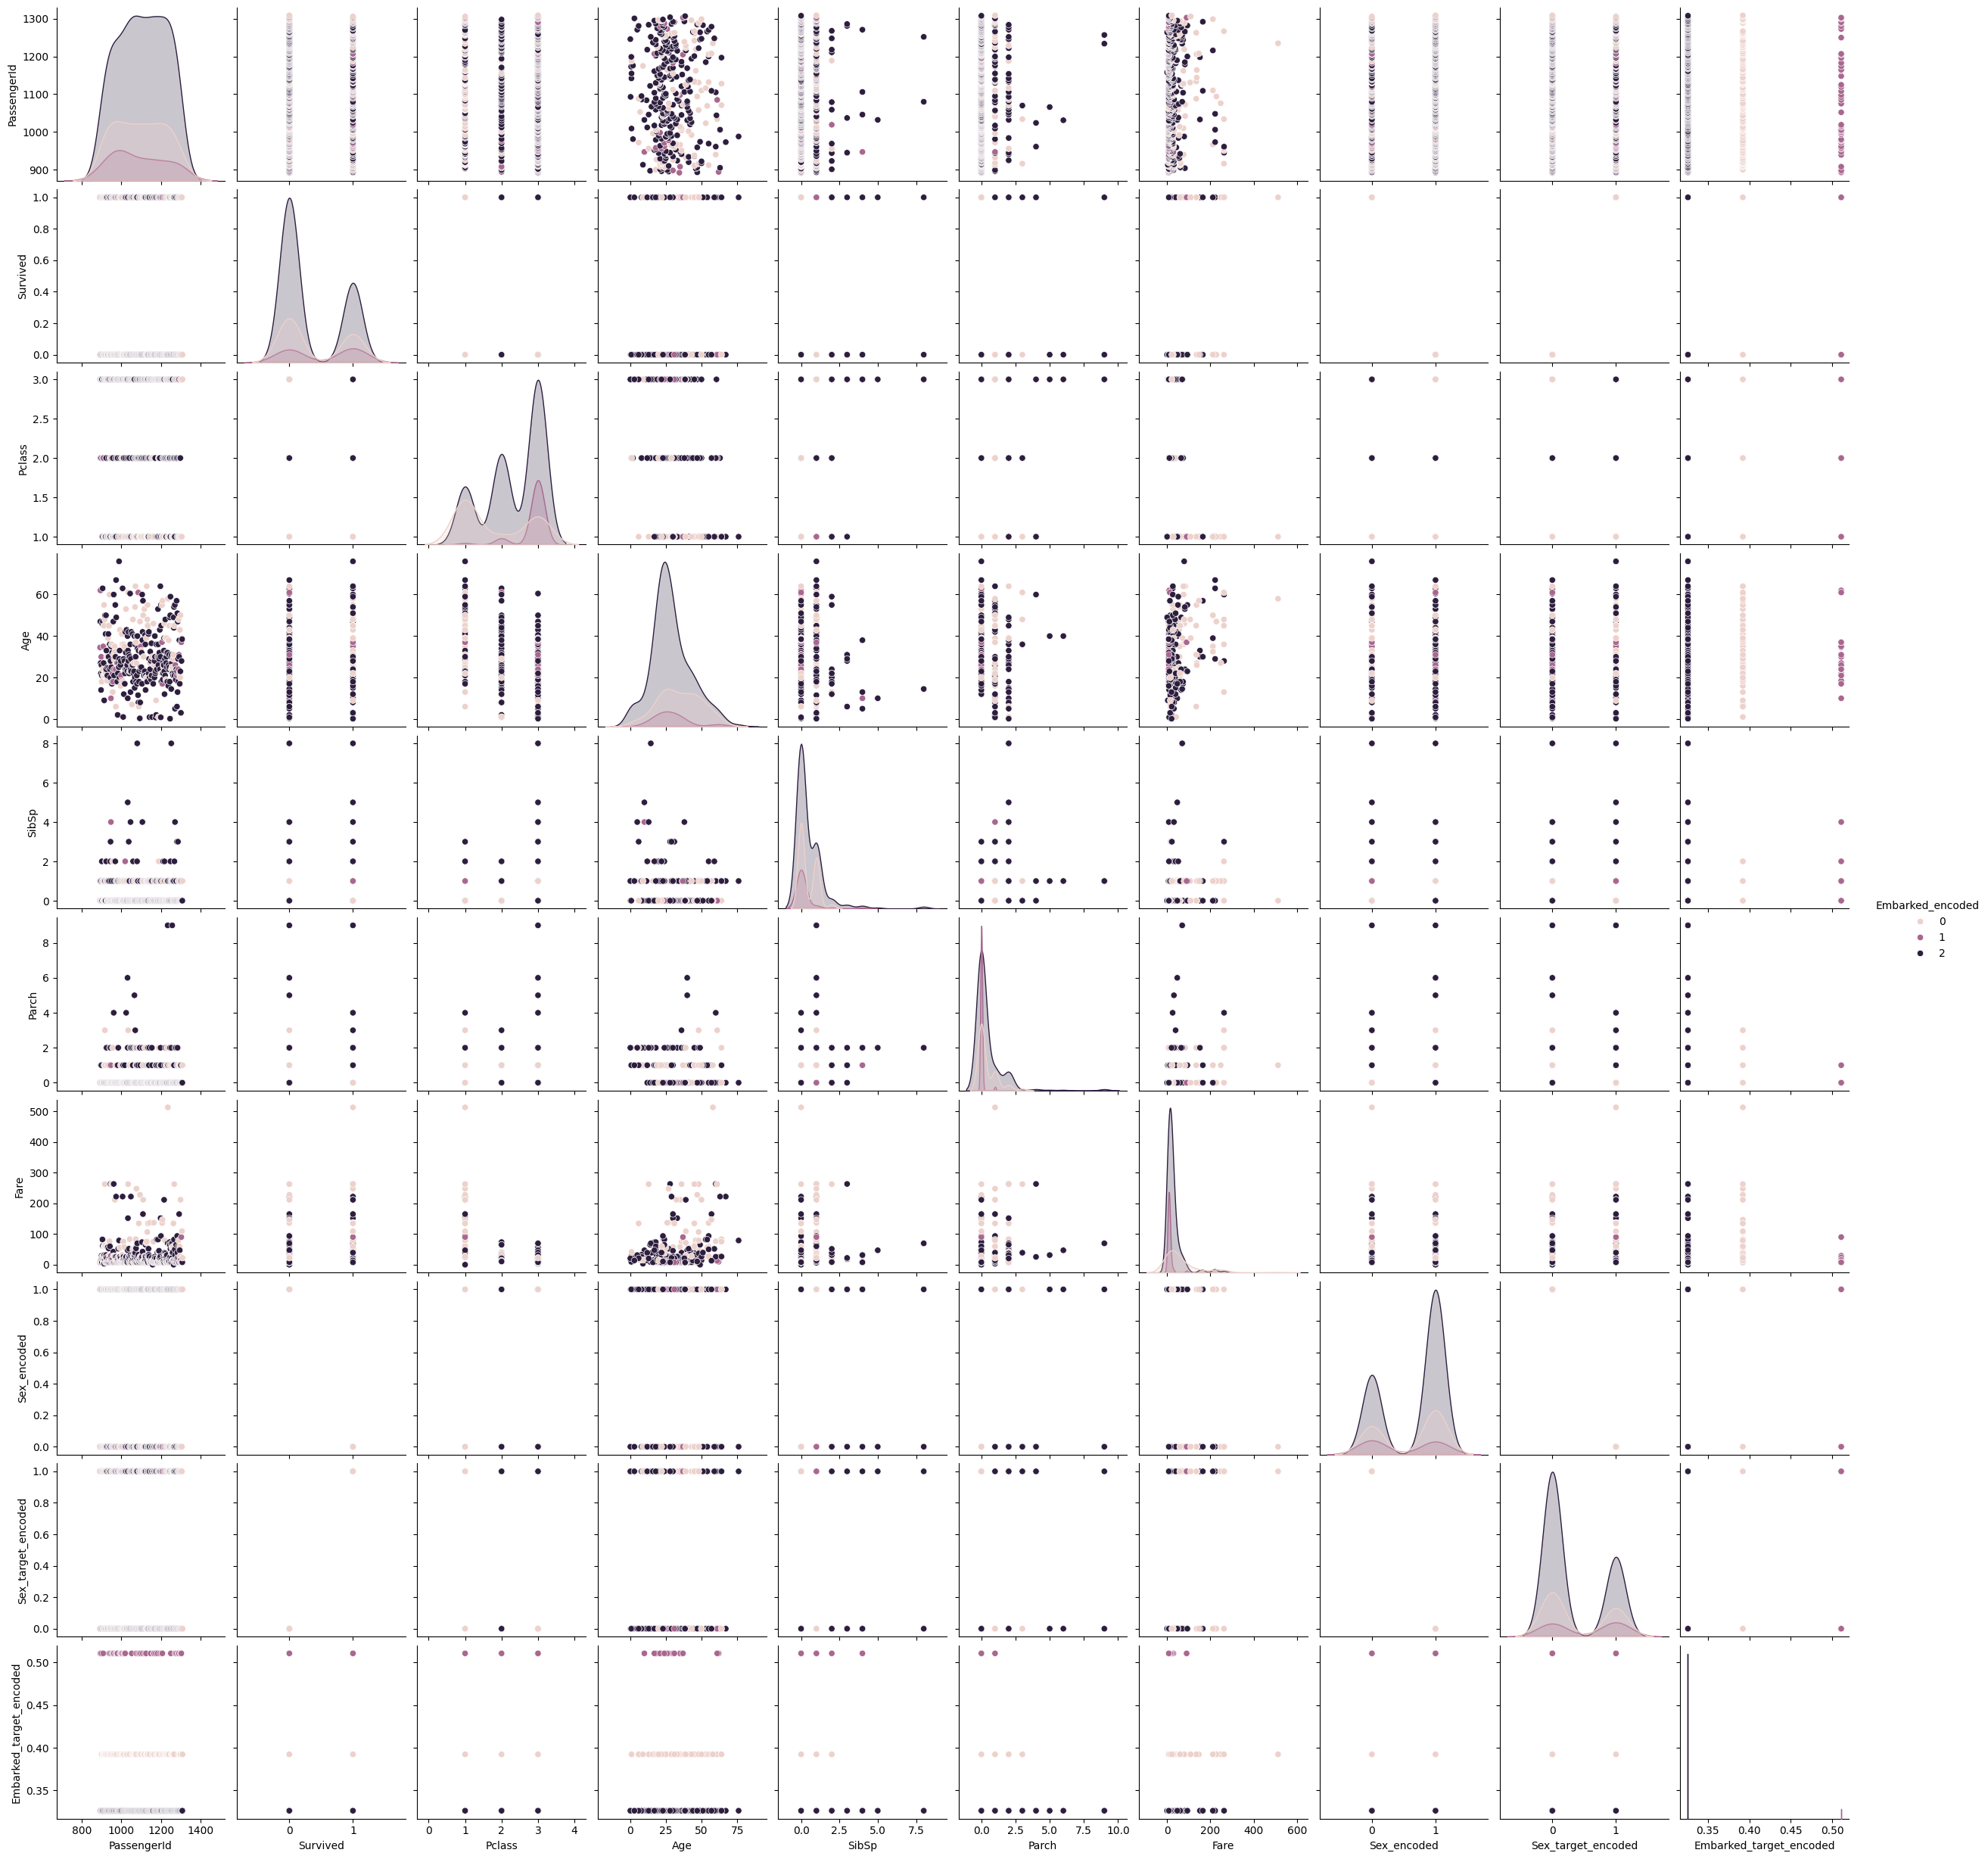

In [55]:
display(titanic_df)
sns.pairplot(titanic_df, hue='Embarked_encoded')
plt.show()